In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline


plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
path = r'F:\数据集\MovieLens\ml-latest'

In [2]:
file = os.listdir(path)
print(file)

['genome-scores.csv', 'genome-tags.csv', 'links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']


# 探索文件

## 导入并查看数据

### 电影与标签的相关性数据

In [3]:
genome_scores = pd.read_csv(path + r'\genome-scores.csv')
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02475
1,1,2,0.02475
2,1,3,0.04900
3,1,4,0.07750
4,1,5,0.12450


### 标签id对应的标签名称信息

In [4]:
genome_tags = pd.read_csv(path + r'\genome-tags.csv')
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [5]:
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
tagId    1128 non-null int64
tag      1128 non-null object
dtypes: int64(1), object(1)
memory usage: 17.7+ KB


In [6]:
genome_tags[genome_tags['tagId'] == 1035]

,tagId,tag
1034,1035,touching


In [7]:
genome_tags[genome_tags['tag'] == 'adventure']

,tagId,tag
28,29,adventure


### 电影在IMDb与TMDb中的ID

In [8]:
link = pd.read_csv(path + r'\links.csv')
link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### 电影信息

In [9]:
movie = pd.read_csv(path + r'\movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 电影评分信息

In [10]:
rating = pd.read_csv(path + r'\ratings.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


### 用户对电影的标签数据

In [11]:
tag = pd.read_csv(path + r'\tags.csv')
tag.head()

,userId,movieId,tag,timestamp
0,1,318,narrated,1425942391
1,20,4306,Dreamworks,1459855607
2,20,89302,England,1400778834
3,20,89302,espionage,1400778836
4,20,89302,jazz,1400778841


# 评分最高的10部电影条形图

## rating表中的总共有多少部电影,以及有多少人参与评论

In [12]:
users_rating = len(rating.userId.unique())
movies_rating = len(rating.movieId.unique())
print('有{0}部电影，有{1}人参加评论'.format(users_rating, movies_rating))

有270896部电影，有45115人参加评论


## 每部电影的平均得分和评论人数,并按照平均评分从高到低

In [13]:
df1 = rating.groupby('movieId').agg({'userId': 'count', 'rating': 'mean'})

In [14]:
df1.rename(columns={'userId': 'count_user', 'rating': 'avg_rating'}, inplace=True)

In [15]:
df1.sort_values('avg_rating', ascending=False, inplace=True)

In [16]:
df1.head()

,count_user,avg_rating
movieId,,
147966,1,5.0
154341,1,5.0
164620,1,5.0
167134,1,5.0
129223,1,5.0


## 排除很少人评分的电影，没有办法体现电影的实际评分

In [17]:
df2 = df1[df1['count_user'] > 100]

In [18]:
df2.head()

,count_user,avg_rating
movieId,,
159817,754,4.478780
318,91082,4.429015
170705,284,4.394366
858,57070,4.339811
50,59271,4.300189


## 评分最高的10部电影，评分人数最多的10部电影

In [19]:
df3 = df2.iloc[0:10]

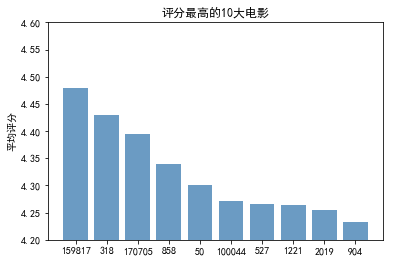

In [20]:
plt.bar(range(10), df3.avg_rating, color='steelblue', alpha = 0.8)
plt.xticks(range(10),df3.index)
# 添加轴标签
plt.ylabel('平均评分')
# 添加标题
plt.title('评分最高的10大电影')
plt.ylim([4.2, 4.6])
plt.show()

## 条形图电影名比用id更恰当

In [21]:
df4 = pd.merge(df3, movie,on='movieId')
df4.head()

,movieId,count_user,avg_rating,title,genres
0,159817,754,4.478780,Planet Earth (2006),Documentary
1,318,91082,4.429015,"Shawshank Redemption, The (1994)",Crime|Drama
2,170705,284,4.394366,Band of Brothers (2001),Action|Drama|War
3,858,57070,4.339811,"Godfather, The (1972)",Crime|Drama
4,50,59271,4.300189,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


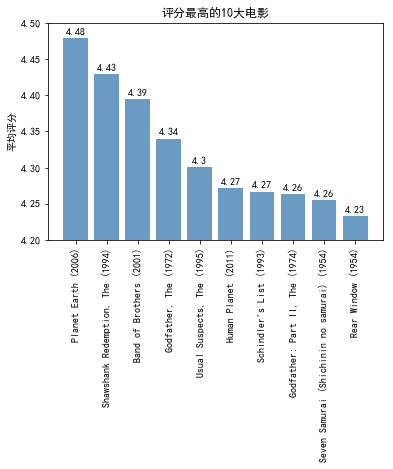

In [22]:
plt.bar(range(10), df4.avg_rating, color='steelblue', alpha = 0.8)
plt.xticks(range(10),df4.title, rotation=90)
# 添加轴标签
plt.ylabel('平均评分')
# 添加标题
plt.title('评分最高的10大电影')
plt.ylim([4.2, 4.5])
for x,y in enumerate(df4.avg_rating):
    plt.text(x,y + 0.005,'%s' %round(y,2),ha='center')
plt.show()

## 使用水平条形图更美观

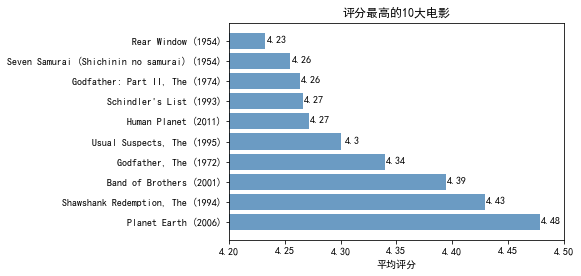

In [108]:
plt.barh(range(10), df4.avg_rating, color='steelblue', alpha=0.8)
plt.yticks(range(10), df4.title, rotation=0)
#添加轴标签
plt.xlabel('平均评分')
# 添加标题
plt.title('评分最高的10大电影')
plt.xlim([4.2, 4.5])
for x, y in enumerate(df4.avg_rating):
    plt.text(y + 0.01, x - 0.1, '%s' % round(y, 2), ha='center')
plt.show()

## 观看人数最多的10部电影

In [23]:
df5 = df2.sort_values('count_user', ascending=False).iloc[0:10]

In [24]:
df6 = pd.merge(df5, movie,on='movieId')

In [25]:
df6.head()

,movieId,count_user,avg_rating,title,genres
0,356,91921,4.052926,Forrest Gump (1994),Comedy|Drama|Romance|War
1,318,91082,4.429015,"Shawshank Redemption, The (1994)",Crime|Drama
2,296,87901,4.169975,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,84078,4.152246,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,77960,4.154098,"Matrix, The (1999)",Action|Sci-Fi|Thriller


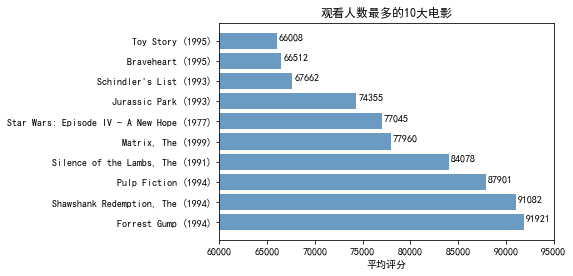

In [113]:
plt.barh(range(10), df6.count_user, color='steelblue', alpha=0.8)
plt.yticks(range(10), df6.title)
# 添加轴标签
plt.xlabel('平均评分')
# 添加标题
plt.title('观看人数最多的10大电影')
plt.xlim([60000, 95000])
for x, y in enumerate(df6.count_user):
    plt.text(y + 1500, x, '%s' % round(y, 2), ha='center')
plt.show()

# 观看人数前100名电影的流派

In [67]:
#提取出需要的需要，有numpy.np.array取出需要的列，然后用join拼接，然后用split分开
df7 = df2.sort_values('count_user', ascending=False).iloc[0:100]
df8 = pd.merge(df7, movie,on='movieId')

In [68]:
df8.head()

,movieId,count_user,avg_rating,title,genres
0,356,91921,4.052926,Forrest Gump (1994),Comedy|Drama|Romance|War
1,318,91082,4.429015,"Shawshank Redemption, The (1994)",Crime|Drama
2,296,87901,4.169975,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,84078,4.152246,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,77960,4.154098,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [69]:
lst1 = '|'.join(np.array(df8.genres)).split('|')
print(lst1)

['Comedy', 'Drama', 'Romance', 'War', 'Crime', 'Drama', 'Comedy', 'Crime', 'Drama', 'Thriller', 'Crime', 'Horror', 'Thriller', 'Action', 'Sci-Fi', 'Thriller', 'Action', 'Adventure', 'Sci-Fi', 'Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Drama', 'War', 'Action', 'Drama', 'War', 'Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Action', 'Adventure', 'Sci-Fi', 'Action', 'Sci-Fi', 'Action', 'Adventure', 'Sci-Fi', 'Action', 'Crime', 'Drama', 'Thriller', 'Action', 'Adventure', 'Crime', 'Mystery', 'Thriller', 'Drama', 'Romance', 'Adventure', 'Drama', 'IMAX', 'Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Crime', 'Drama', 'Adventure', 'Fantasy', 'Thriller', 'Adventure', 'Comedy', 'Sci-Fi', 'Action', 'Crime', 'Thriller', 'Mystery', 'Sci-Fi', 'Thriller', 'Mystery', 'Thriller', 'Comedy', 'Crime', 'Drama', 'Thriller', 'Adventure', 'Fantasy', 'Action', 'Adventure', 'Drama', 'Fantasy', 'Adventure', 'Drama', 'Western', 'Action', 'Drama', 'War', 'Adventure', 'Animation', 'Children', 'Comedy'

In [70]:
dic1 = dict()
for genre in lst1:
    dic1[genre] = dic1.get(genre, 0) + 1
print(dic1)

{'Comedy': 30, 'Drama': 39, 'Romance': 17, 'War': 4, 'Crime': 26, 'Thriller': 34, 'Horror': 5, 'Action': 43, 'Sci-Fi': 26, 'Adventure': 36, 'Animation': 7, 'Children': 11, 'Fantasy': 15, 'Mystery': 10, 'IMAX': 5, 'Western': 1, 'Musical': 4, 'Film-Noir': 1}


In [71]:
s = pd.Series(dic1)

In [72]:
s.sort_values(ascending=False, inplace=True)

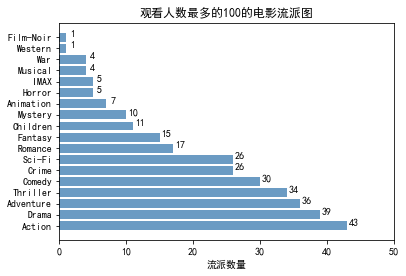

In [120]:
plt.barh(range(len(dic1)), s.values, color='steelblue', alpha=0.8)
plt.yticks(range(len(dic1)), s.index)
# 添加轴标签
plt.xlabel('流派数量')
# 添加标题
plt.title('观看人数最多的100的电影流派图')
plt.xlim([0, 50])
for x, y in enumerate(s.values):
    plt.text(y + 1, x, '%s' % y, ha='center')
plt.show()

# 电影评分直方图和各流派电影数量图

In [77]:
#
sorted(rating.rating.unique())

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

## 电影评分直方图

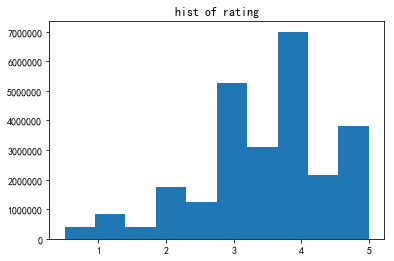

In [79]:
plt.hist(rating.rating)
plt.title("hist of rating")
plt.show()

## 各流派的电影数量条形图

In [82]:
for i in range(len(movie)):
    tags_cur = movie.loc[i,'genres'].split("|")
    for t in tags_cur:
        movie.loc[i,t] = 1

In [83]:
movie.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,1.0,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
#统计每一个列的累加，也就是非空个数
genres_stat = movie.iloc[:,3:].sum(axis = 0)

In [135]:
genres_stat.sort_values(inplace=True)

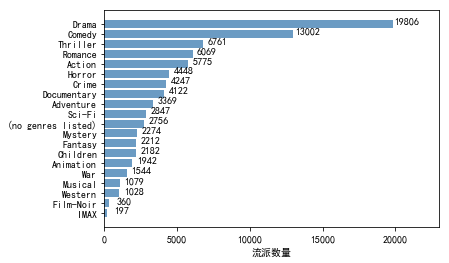

In [136]:
plt.barh(range(len(genres_stat)), genres_stat.values, color='steelblue', alpha=0.8)
plt.yticks(range(len(genres_stat)), genres_stat.index)
# 添加轴标签
plt.xlabel('电影数量')
# 添加标题
plt.title('各流派的电影数量')
plt.xlim([0, 23000])
for x, y in enumerate(genres_stat.values):
    plt.text(y + 1000, x, '%s' % int(y), ha='center')
plt.show()

# 各流派电影平均得分

各个流派每部电影的平均得分之和 / 各个流派电影数量

In [143]:
df9 = rating.groupby('movieId').agg({'rating': 'mean'})

In [147]:
df10 = pd.merge(movie, df9, on='movieId')

In [ ]:
df10[df10.columns[3: -1]] = df10[df10.columns[3: -1]] * df10.rating

In [193]:
for col in df10.columns[3: -1]:
    df10[col] = df10[col] * df10.rating

In [204]:
genres_mean = df10.iloc[:,3: -1].sum(axis = 0) / movie.iloc[:,3:].sum(axis = 0)
genres_mean

Adventure             2.955424
Animation             3.100324
Children              2.972214
Comedy                2.988326
Fantasy               2.993547
Romance               3.092508
Drama                 3.141589
Action                2.871735
Crime                 3.052301
Thriller              2.894529
Horror                2.546791
Mystery               3.007161
Sci-Fi                2.748166
IMAX                  3.271057
Documentary           3.368041
War                   3.189509
Musical               3.127578
Western               2.888604
Film-Noir             3.256767
(no genres listed)    2.905038
dtype: float64

In [209]:
genres_mean.sort_values(inplace=True)

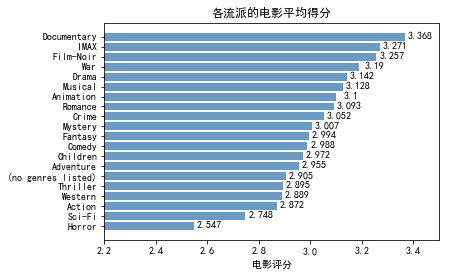

In [217]:
plt.barh(range(len(genres_mean)), genres_mean.values, color='steelblue', alpha=0.8)
plt.yticks(range(len(genres_mean)), genres_mean.index)
# 添加轴标签
plt.xlabel('电影评分')
# 添加标题
plt.title('各流派的电影平均得分')
plt.xlim([2.2, 3.5])
for x, y in enumerate(genres_mean.values):
    plt.text(y + 0.06, x - 0.2, '%s' % round(y, 3), ha='center')
plt.show()